<div >
<img src = "../banner.jpg" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_SS/blob/main/Lecture09/Notebook_SS09_Arboles
.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# CARTs

## Predicting House Prices

Our objective today is to construct a model to predict house prices. From Rosen's landmark paper "Hedonic Prices and Implicit Markets: Product Differentiation in Pure Competition" (1974), we know that a vector of its characteristics describes a differentiated good.

In the case of a house, these characteristics may include structural attributes (e.g., number of bedrooms), neighborhood public services (e.g., local school quality), and local amenities (e.g., crime, air quality, etc). Thus, we can write the market price of the house as:

$$
Price=f(structural\,attributes,amenities,...)
$$


However, Rosen's theory doesn't tell us much about the functional form of $f$. 

## Carts by hand

Let's load the packages:

In [1]:
# install.packages("pacman") #run this line if you use Google Colab

In [19]:
#packages
require("pacman")
p_load("tidyverse","ggplot2")

 And the toy data set:

In [14]:
db<-read.csv('https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/toy_houses.csv')

In [15]:
head(db)

,X,price,habitaciones,DCBD
,<int>,<dbl>,<int>,<dbl>
1,1,162753.09,3,1.190307
2,2,73131.30,0,1.910839
3,3,162757.45,2,1.227716
4,4,73127.75,1,1.824990
5,5,73128.71,0,1.915576
6,6,98715.60,3,1.505208


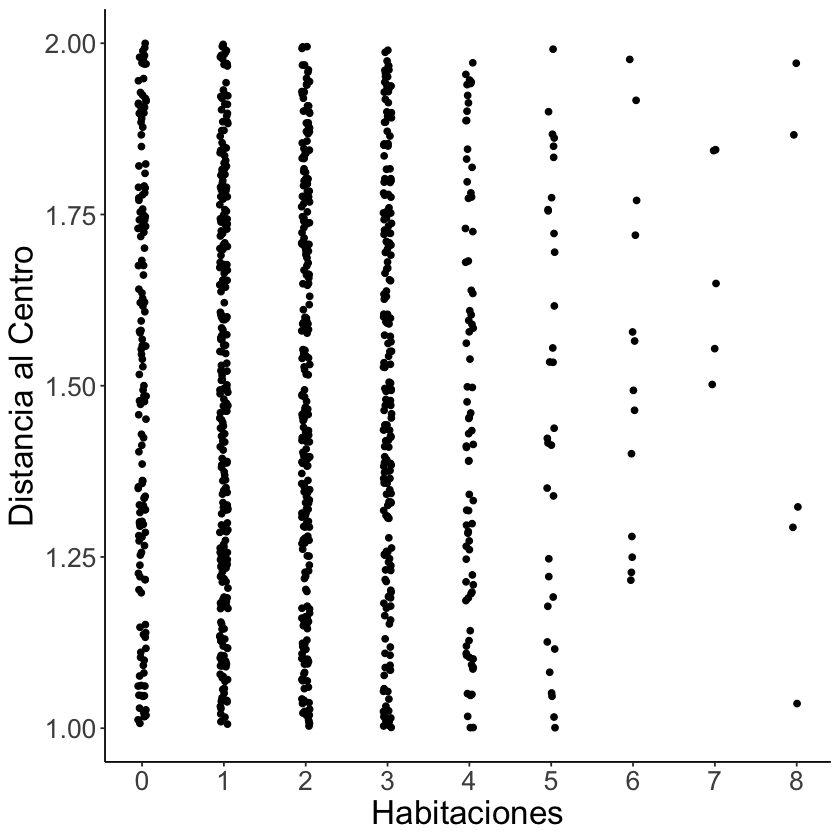

In [20]:
ggplot(db) +
  geom_point(aes(x=habitaciones,y=DCBD),position=position_jitter(width = .05)) +
  scale_x_continuous(breaks=seq(0,8,1)) +
  theme_classic() +
  xlab("Habitaciones") +
  ylab("Distancia al Centro") +
  theme(legend.position =  "none",
      text=element_text(size=20))

### CARTs


-  Datos: $y_{n\times 1}$  y $X_{n\times p}$ 

-  Definiciones


-  $j$ es la variable que parte el espacio y  $s$ es el punto de partición

-  Defina los siguientes semiplanos
\begin{align}
R_1(j,s)=\{X|X_j\leq s\} \,\,\, \& \,\,\, R_2(j,s)=\{X|X_j > s\}
\end{align}

-  *El problema*: buscar la variable de partición $X_j$ y el punto $s$ de forma tal que 


\begin{align}
\underset{j,s}{min} \left[ \underset{y_{R_1}}{min}\sum_{x_i\in R_1(j,s)}(y-y_{R_1})^2+ \underset{y_{R_2}}{min}\sum_{x_i\in R_2(j,s)}(y-y_{R_2})^2\right]
\end{align}



#### Algoritmo

1. Iniciemos por DBCD

In [22]:
MSE_dbcd<-NA

j<-1
for(i in seq(1,2,0.25)){
    #Region 1
  R1<- db %>% filter(DCBD<=i)
  R1<- R1 %>% mutate(c1=mean(price))
  MSEr1<- ifelse(is.na(mean((R1$price-R1$c1)^2)),0,mean((R1$price-R1$c1)^2))
    #Region 2
  R2<- db %>% filter(DCBD>i)
  R2<- R2 %>% mutate(c2=mean(price))
  MSEr2<- ifelse(is.na(mean((R2$price-R2$c2)^2)),0,mean((R2$price-R2$c2)^2))
  
  MSE_dbcd[j]<-MSEr1+MSEr2
  j<-j+1
}

MSE_dbcd

[1] 1716336929 1619184821  144556602 1612314034 1716336929

2. Luego por Habitaciones

In [25]:
MSE_hab<-NA
for(i in 0:8){
  R1<- db %>% filter(habitaciones<=i)
  R1<- R1 %>% mutate(c1=mean(price))
  MSEr1<- ifelse(is.na(mean((R1$price-R1$c1)^2)),0,mean((R1$price-R1$c1)^2))
  R2<- db %>% filter(habitaciones>i)
  R2<- R2 %>% mutate(c2=mean(price))
  MSEr2<- ifelse(is.na(mean((R2$price-R2$c2)^2)),0,mean((R2$price-R2$c2)^2))
  
  MSE_hab[i+1]<-MSEr1+MSEr2
  
}
MSE_hab

[1] 3655836376 3478068100 3029642859 2817877745 2778785039 2740560656 2585869900
[8] 2703378640 1716336929

Mínimo?


In [27]:
MSE<-c(MSE_dbcd,MSE_hab)
MSE[which.min(MSE)]
MSE

[1] 144556602

[1] 1716336929 1619184821  144556602 1612314034 1716336929 3655836376
 [7] 3478068100 3029642859 2817877745 2778785039 2740560656 2585869900
[13] 2703378640 1716336929

<iframe src="m.html"></iframe>

### In R

There are multiple packages, we are going to use `rpart`

In [29]:
p_load("rpart")

In [30]:
mytree<-rpart(log(price)~DCBD+habitaciones,data=db)

In [31]:
mytree

n= 1000 

node), split, n, deviance, yval
      * denotes terminal node

1) root 1000 1.323913e+02 11.66130  
  2) DCBD>=1.499274 483 9.599378e+00 11.29876  
    4) habitaciones< 2.5 324 5.722203e-07 11.20000 *
    5) habitaciones>=2.5 159 1.741396e-07 11.50000 *
  3) DCBD< 1.499274 517 1.785914e-07 12.00000 *

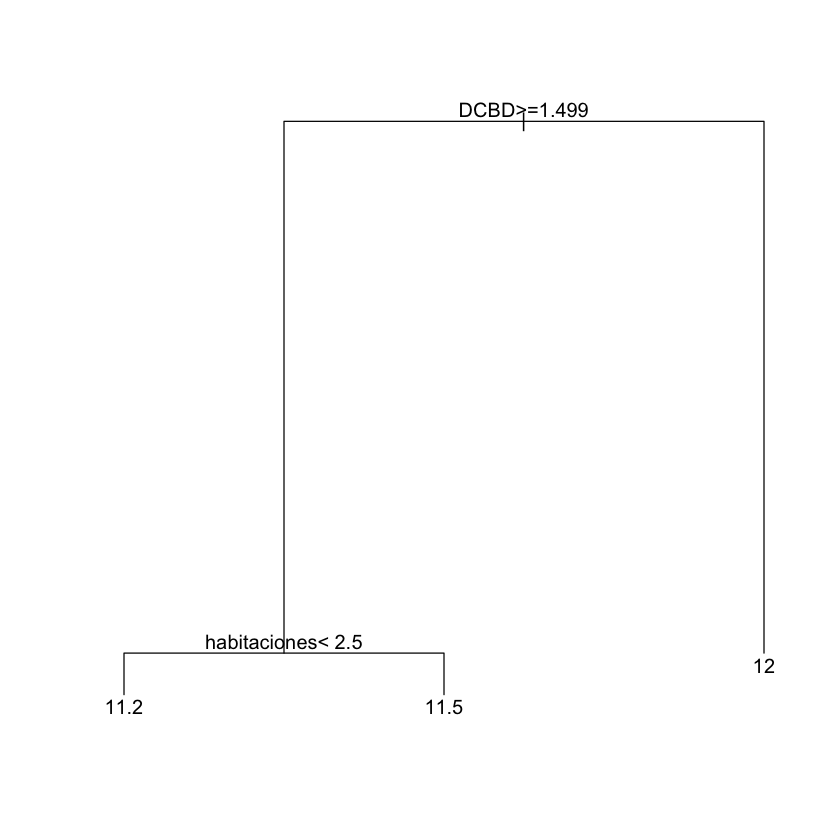

In [33]:
plot(mytree)
text(mytree)

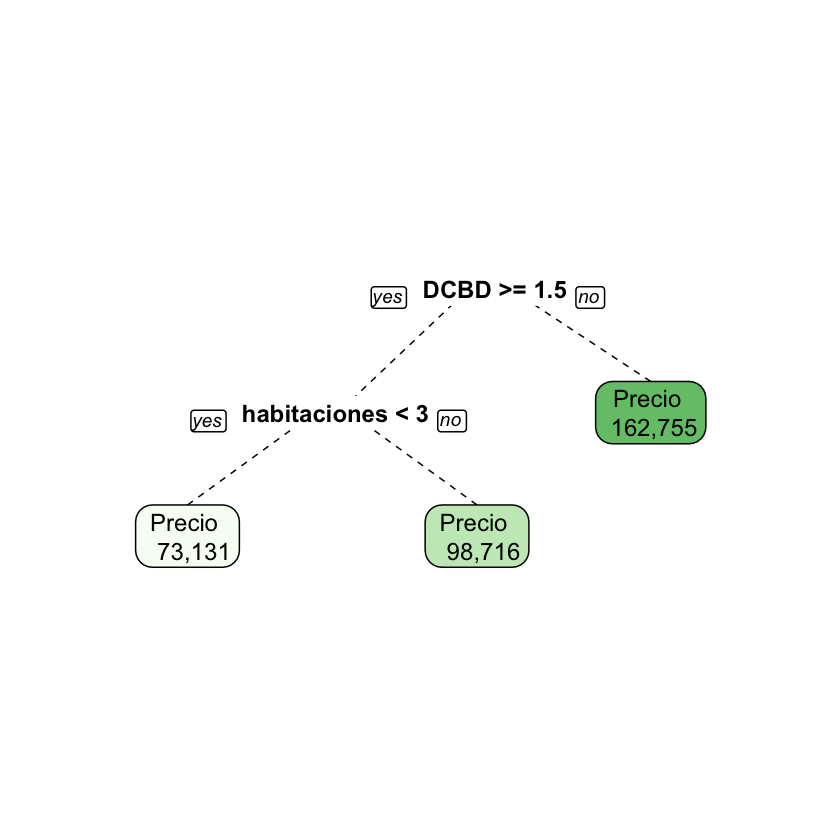

In [36]:
p_load("rpart.plot")

prp(mytree, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=TRUE,ycompress = TRUE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round(exp(mytree$frame$yval), 0), nsmall=0, big.mark=",")))

In [70]:
mytree_full<-rpart(log(price)~DCBD+habitaciones,data=db,cp=-1)

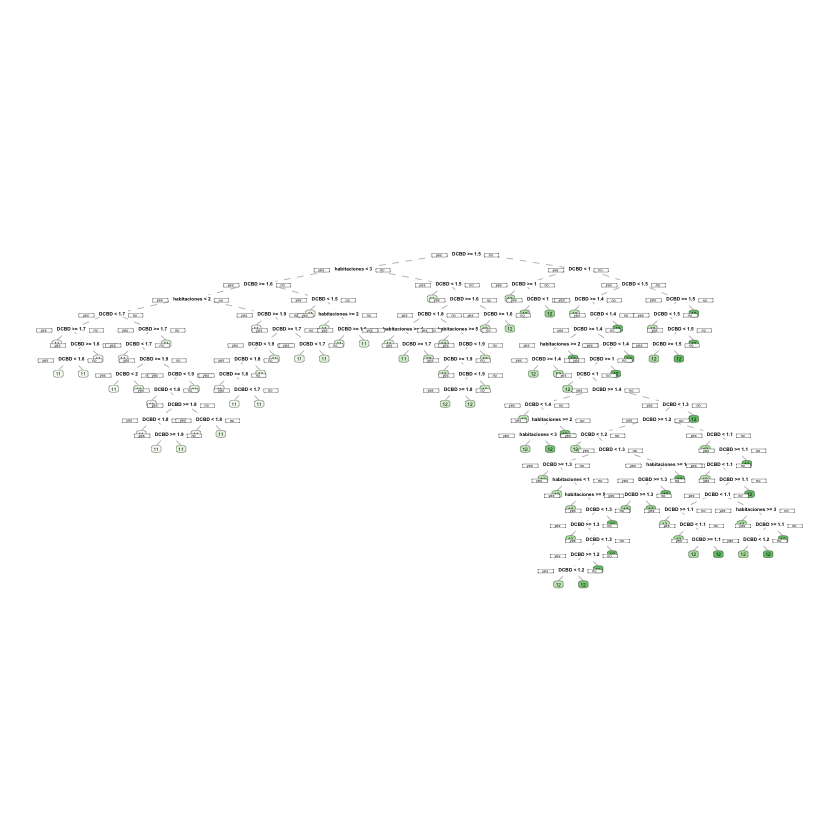

In [74]:
prp(mytree_full, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=TRUE,ycompress = TRUE)

In [ ]:
# With Ames Data Set

In [54]:
p_load("modeldata")

data("ames", package = "modeldata")

ames<-ames  %>% filter(Neighborhood %in%c("North_Ames", "College_Creek", "Old_Town", "Edwards", "Somerset", "Northridge_Heights", "Gilbert", "Sawyer", "Northwest_Ames", "Sawyer_West"))


In [59]:
head(ames)

MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,⋯,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,5,2010,WD,Normal,215000,-93.61975,42.05403
One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.61976,42.05301
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.61939,42.05266
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,4,2010,WD,Normal,244000,-93.61732,42.05125
Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.63893,42.06090
Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,No_Fence,None,0,6,2010,WD,Normal,195500,-93.63893,42.06078


The description of the variables can be viewed here: https://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [64]:
class(ames$Year_Sold)

[1] "integer"

In [84]:
amestree<-rpart(log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type ,data=ames,cp=0.02)

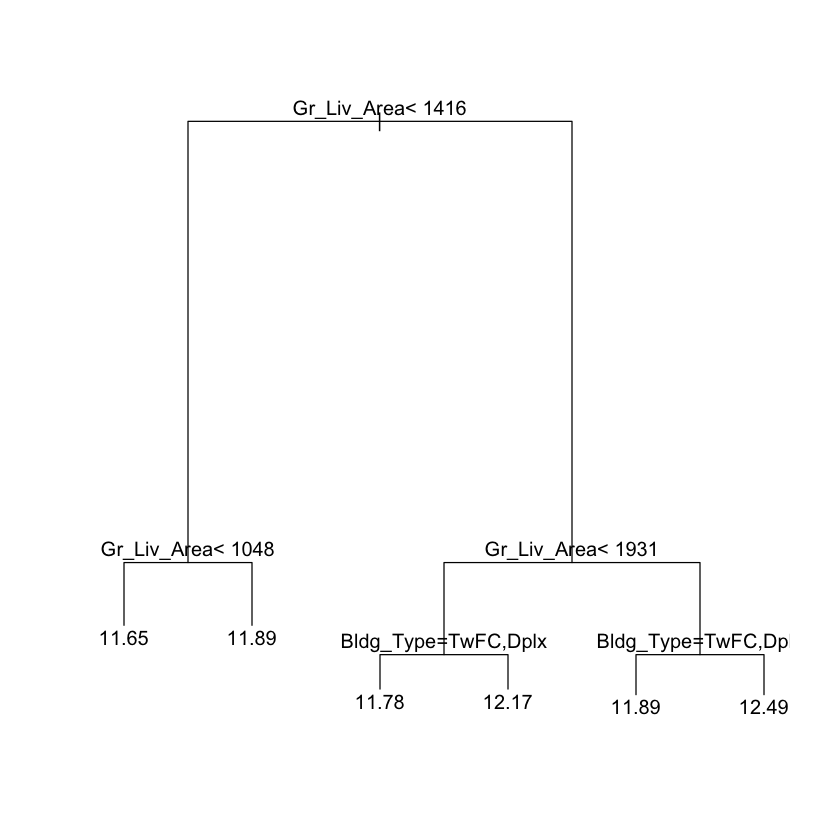

In [94]:
plot(amestree)
text(amestree,pretty=TRUE)

#### Cost Complexity Prunning



In [95]:
 amestree$cptable

,CP,nsplit,rel error,xerror,xstd
1,0.32614138,0,1.0000000,1.0030587,0.04251787
2,0.06807445,1,0.6738586,0.6956354,0.03223558
3,0.04635823,2,0.6057842,0.6256913,0.03063913
4,0.02957142,3,0.5594259,0.5900156,0.02893483
5,0.02541531,4,0.5298545,0.5742631,0.02870690
6,0.02000000,5,0.5044392,0.5359983,0.02775484


In [ ]:
amestree<-rpart(log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type ,data=ames)

In [ ]:
 amestree$cptable

## With Caret

In [98]:
p_load("caret")
set.seed(123)

In [99]:
fitControl<-trainControl(method ="cv",
                         number=5)


In [103]:
tree <- train(
    log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type,
    data=ames,
    method = "rpart",
    trControl = fitControl,
    #tuneLength=100
)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In [104]:
tree

CART 

2063 samples
   2 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1649, 1650, 1651, 1651, 1651 
Resampling results across tuning parameters:

  cp            RMSE       Rsquared   MAE      
  6.213245e-05  0.2694655  0.4901274  0.1985054
  6.408508e-05  0.2694655  0.4901274  0.1985054
  6.727128e-05  0.2694731  0.4900677  0.1985017
  6.775585e-05  0.2694731  0.4900677  0.1985017
  7.078331e-05  0.2694655  0.4901049  0.1984962
  7.105372e-05  0.2694655  0.4901049  0.1984962
  7.780870e-05  0.2694524  0.4901486  0.1984672
  7.841836e-05  0.2694524  0.4901486  0.1984672
  8.521449e-05  0.2694719  0.4900947  0.1985146
  8.782385e-05  0.2694727  0.4900899  0.1985118
  8.984526e-05  0.2694727  0.4900899  0.1985118
  1.121087e-04  0.2696309  0.4896370  0.1986826
  1.142042e-04  0.2696309  0.4896370  0.1986826
  1.149987e-04  0.2696597  0.4895395  0.1987036
  1.151921e-04  0.2696597  0.4895395  0.1987036
  1.185535e-04  0.2696597  0.4895395  0

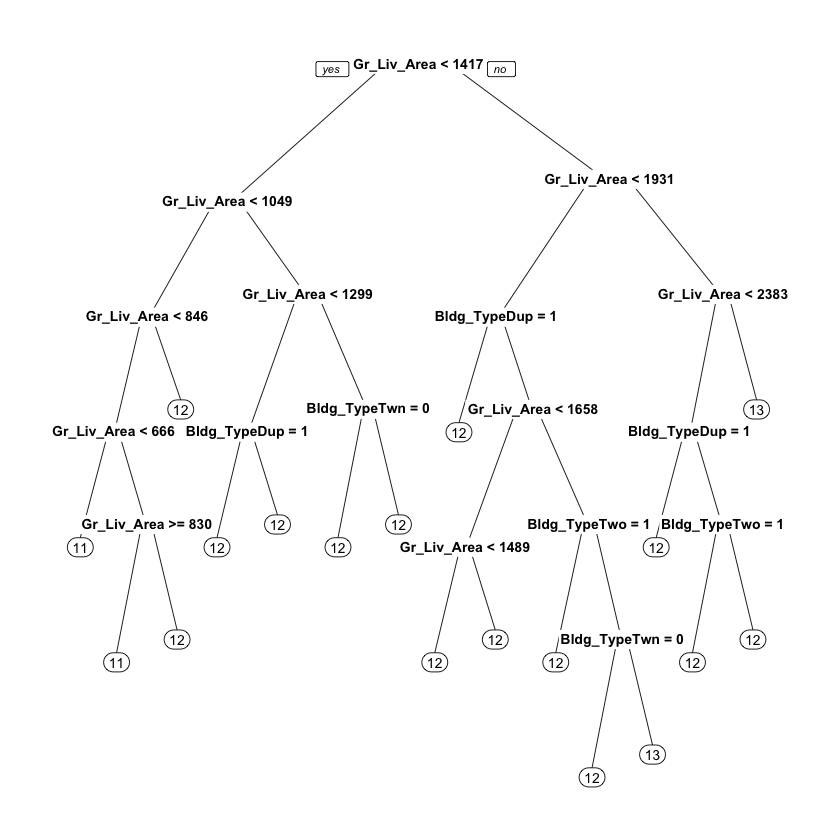

In [106]:
prp(tree$finalModel)

## Example Problem Set

In [26]:
test<- ames_sf  %>% filter(Neighborhood=="North_Ames")

train<-ames_sf  %>% filter(Neighborhood!="North_Ames")

In [27]:
set.seed(123)

location_folds_train <- 
  spatial_leave_location_out_cv(
    train,
    group = Neighborhood
  )



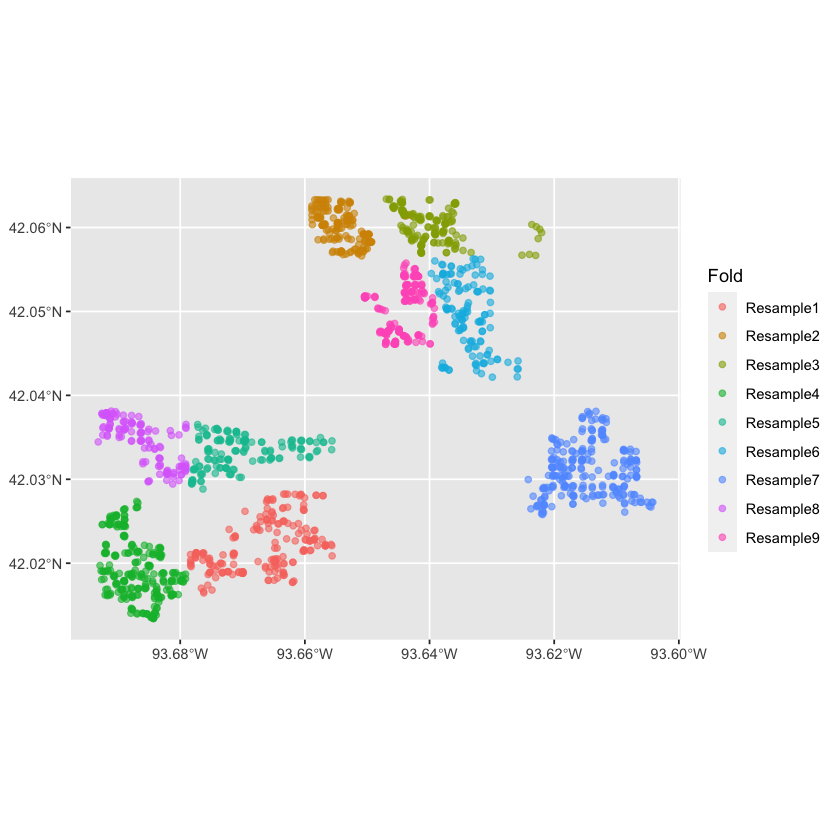

In [28]:
autoplot(location_folds_train)

In [29]:
folds_train<-list()
for(i in 1:length(location_folds_train$splits)){
  folds_train[[i]]<- location_folds_train$splits[[i]]$in_id
}


In [30]:
fitControl_tp<-trainControl(method ="cv",
                         number=5)



In [72]:
EN_tp<-train(log(Sale_Price) ~ Gr_Liv_Area:Bldg_Type ,
             data=train,
             method = 'glmnet', 
             trControl = fitControl_tp,
             metric="MAE",
             tuneGrid = expand.grid(alpha =seq(0,1,length.out = 20),
                                    lambda = seq(0.001,0.2,length.out = 50))
              ) 

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In [32]:
EN_tp

glmnet 

1620 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1426, 1454, 1455, 1353, 1469, 1489, ... 
Resampling results across tuning parameters:

  alpha       lambda       RMSE       Rsquared   MAE      
  0.00000000  0.001000000  0.2747891  0.4516070  0.2168726
  0.00000000  0.005061224  0.2747891  0.4516070  0.2168726
  0.00000000  0.009122449  0.2747891  0.4516070  0.2168726
  0.00000000  0.013183673  0.2747891  0.4516070  0.2168726
  0.00000000  0.017244898  0.2747891  0.4516070  0.2168726
  0.00000000  0.021306122  0.2747960  0.4516083  0.2168798
  0.00000000  0.025367347  0.2750925  0.4516609  0.2171856
  0.00000000  0.029428571  0.2751758  0.4518359  0.2174669
  0.00000000  0.033489796  0.2751740  0.4520579  0.2176926
  0.00000000  0.037551020  0.2751944  0.4522747  0.2179321
  0.00000000  0.041612245  0.2752362  0.4524863  0.2181767
  0.00000000  0.045673469  0.2752988  0.4526927  0.2184421
  0.00000000  0.049734694 

In [66]:
EN_tp$bestTune

,alpha,lambda
,<dbl>,<dbl>
6,0,0.02130612


In [73]:
test$log_price_hat<-predict(EN_tp,newdata = test)

In [74]:
head(test  %>% select(Sale_Price,log_price_hat)  %>% st_drop_geometry())

Sale_Price,log_price_hat
<int>,<dbl>
215000,12.14134
105000,11.72142
172000,11.96066
244000,12.39219
149000,11.78109
149900,11.82198


In [75]:
test<- test  %>% mutate(price_hat=exp(log_price_hat))
head(test  %>% select(Sale_Price,log_price_hat,price_hat)  %>% st_drop_geometry())

Sale_Price,log_price_hat,price_hat
<int>,<dbl>,<dbl>
215000,12.14134,187463.6
105000,11.72142,123182.4
172000,11.96066,156477.0
244000,12.39219,240911.8
149000,11.78109,130756.8
149900,11.82198,136213.8


#### What is Kaggle's score?

In [76]:
#MAE
mean(abs(test$Sale_Price-test$price_hat))

[1] 18418.94

In [78]:
#MAE
mean(abs(test$Sale_Price-round(test$price_hat)))

[1] 18418.95